In [1]:
import libsql_experimental as libsql
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:

exportaciones = [
    741.1, 785.8, 1089.8, 1137.6, 1214.5, 1253.9, 1108.1, 1042.2, 
    1246.3, 1226.2, 1319.9, 1589.8, 2194.6, 2867.4, 4088.3, 4821.8, 
    6932.9, 5399.6, 6966.1, 9145.8, 11814.6, 12251.7, 12899.1, 8737.1, 
    7126.3, 8223.1, 9014.7, 8804.9, 6974.7, 11165.2, 13856.3, 10806.0, 8923.0
]
hidrocarburos = [
    126.3, 96.4, 98.2, 140.5, 133.0, 98.1, 86.2, 63.0, 157.9, 286.7, 
    331.5, 485.4, 815.4, 1400.2, 2011.2, 2240.0, 3483.4, 2107.3, 2984.4, 
    4112.4, 5871.0, 6624.9, 6595.2, 3971.1, 2133.7, 2633.0, 3042.5, 
    2741.4, 1999.8, 2269.4, 2973.8, 2061.1, 1616.1
]

minerales = [
    274.6, 193.9, 185.1, 243.9, 237.4, 279.2, 243.1, 227.5, 260.1, 189.3, 
    199.9, 229.2, 297.7, 350.5, 793.6, 1062.5, 1520.8, 1498.5, 1861.0, 
    2427.0, 2076.6, 1974.4, 2039.8, 1740.5, 1900.1, 2391.7, 2405.5, 
    2106.3, 1538.6, 2653.4, 2961.4, 2617.8, 3151.3
]
año=[1992+i for i in range(len(minerales))]
# Crear DataFrame
df = pd.DataFrame({
    "año":año,
    "exportaciones": exportaciones,
    "hidrocarburos": hidrocarburos,
    "minerales": minerales
})

# Calcular las nuevas columnas
df.set_index("año",inplace=True)
df["hidrocarburos/exportaciones"] = df["hidrocarburos"] / df["exportaciones"]
df["minerales/exportaciones"] = df["minerales"] / df["exportaciones"]
df.tail(30)

,exportaciones,hidrocarburos,minerales,hidrocarburos/exportaciones,minerales/exportaciones
año,,,,,
1995,1137.6,140.5,243.9,0.123506,0.214399
1996,1214.5,133.0,237.4,0.109510,0.195471
1997,1253.9,98.1,279.2,0.078236,0.222665
1998,1108.1,86.2,243.1,0.077791,0.219385
1999,1042.2,63.0,227.5,0.060449,0.218288
2000,1246.3,157.9,260.1,0.126695,0.208698
2001,1226.2,286.7,189.3,0.233812,0.154379
2002,1319.9,331.5,199.9,0.251155,0.151451
2003,1589.8,485.4,229.2,0.305321,0.144169


In [3]:
# Dividir en dos periodos
df_1992_2005 = df.loc[1992:2005, ["hidrocarburos/exportaciones", "minerales/exportaciones"]]
df_2006_2024 = df.loc[2006:2024, ["hidrocarburos/exportaciones", "minerales/exportaciones"]]

# Obtener estadísticas descriptivas
stats_1992_2005 = df_1992_2005.describe()
stats_2006_2024 = df_2006_2024.describe()

# Seleccionar solo las estadísticas requeridas
stats_1992_2005 = stats_1992_2005.T[['mean', 'std', 'min', 'max']]
stats_2006_2024 = stats_2006_2024.T[['mean', 'std', 'min', 'max']]

# Crear un DataFrame consolidado con las estadísticas de cada periodo
df_stats = pd.concat([stats_1992_2005, stats_2006_2024], axis=1)
df_stats.columns = pd.MultiIndex.from_product(
    [['1992-2005', '2006-2024'], ['mean', 'std', 'min', 'max']]
)

df_stats


1992-2005                               2006-2024  \
                                 mean       std       min       max      mean   
hidrocarburos/exportaciones  0.186396  0.127821  0.060449  0.488317  0.372403   
minerales/exportaciones      0.198138  0.062878  0.122236  0.370530  0.235214   

                                                           
                                  std       min       max  
hidrocarburos/exportaciones  0.120745  0.181116  0.540733  
minerales/exportaciones      0.048235  0.158135  0.353166

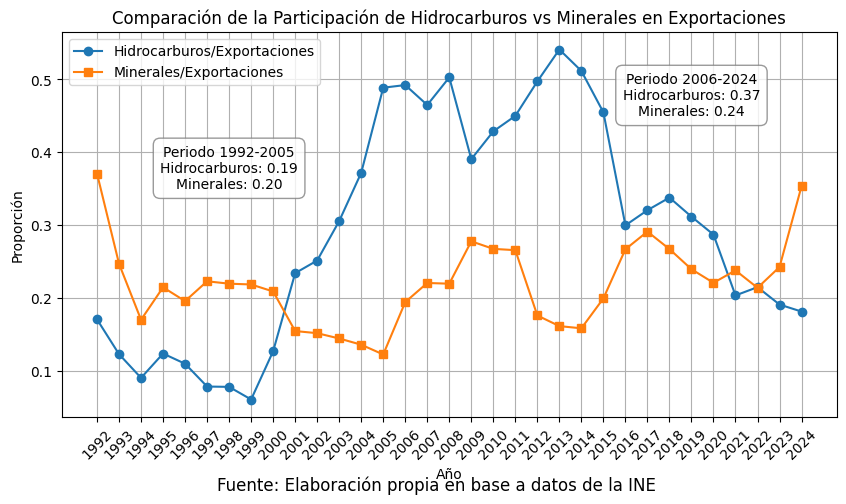

In [15]:
import matplotlib.pyplot as plt


# Calcular medias de los periodos
media_1992_2005 = {
    "hidrocarburos/exportaciones": df_1992_2005["hidrocarburos/exportaciones"].mean(),
    "minerales/exportaciones": df_1992_2005["minerales/exportaciones"].mean()
}

media_2006_2024 = {
    "hidrocarburos/exportaciones": df_2006_2024["hidrocarburos/exportaciones"].mean(),
    "minerales/exportaciones": df_2006_2024["minerales/exportaciones"].mean()
}

# Definir textos de anotación
text_1992_2005 = (
    "Periodo 1992-2005\n"
    f"Hidrocarburos: {media_1992_2005['hidrocarburos/exportaciones']:.2f}\n"
    f"Minerales: {media_1992_2005['minerales/exportaciones']:.2f}"
)

text_2006_2024 = (
    "Periodo 2006-2024\n"
    f"Hidrocarburos: {media_2006_2024['hidrocarburos/exportaciones']:.2f}\n"
    f"Minerales: {media_2006_2024['minerales/exportaciones']:.2f}"
)

# Crear la gráfica
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["hidrocarburos/exportaciones"], label="Hidrocarburos/Exportaciones", marker='o')
plt.plot(df.index, df["minerales/exportaciones"], label="Minerales/Exportaciones", marker='s')

# Configuración de la gráfica
plt.xlabel("Año")
plt.ylabel("Proporción")
plt.title("Comparación de la Participación de Hidrocarburos vs Minerales en Exportaciones")
plt.legend()
plt.grid(True)

# Configurar propiedades del recuadro de anotación
bbox_props = dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="gray", alpha=0.8)

# Agregar anotaciones
plt.text(1998, 0.35, text_1992_2005, fontsize=10, color='black', bbox=bbox_props, ha='center')
plt.text(2019, 0.45, text_2006_2024, fontsize=10, color='black', bbox=bbox_props, ha='center')

plt.xticks(df.index, rotation=45)
plt.figtext(0.5, -0.036, "Fuente: Elaboración propia en base a datos de la INE", ha="center", fontsize=12, color='black')
# Mostrar la gráfica
plt.show()


In [4]:
# Calcular los retornos logarítmicos interanuales
log_returns = np.diff(np.log(exportaciones))

# Calcular la volatilidad como la desviación estándar muestral de los retornos
volatilidad = np.std(log_returns, ddof=1)

print("Volatilidad anual (desviación estándar de los retornos logarítmicos):", volatilidad)

Volatilidad anual (desviación estándar de los retornos logarítmicos): 0.21177712533872656
